In [2]:
import pandas as pd
import numpy as np
from lib.utils import read_jsonl
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import json
from pathlib import Path

In [3]:
results_dir = Path('statistics')
results_dir.mkdir(exist_ok=True, parents=True)

In [4]:
plt.rcParams.update({'font.size': 14}) 

colormap = {
    'books': 'tab:blue',
    'music': 'tab:olive'
}

### Basic statistics

In [5]:
data = {
    'books': {},
    'music': {}
}
for domain in data:
    data[domain] = {}
    data[domain]['submissions'] = read_jsonl(f"data/processed/{domain}/submissions_ns.jsonl")
    data[domain]['comments'] = read_jsonl(f"data/processed/{domain}/comments/comments.jsonl")
    
    with open(f"data/processed/{domain}/recs.json") as f:
        data[domain]['recs'] = json.load(f)
        
    data[domain]['items'] = pd.read_csv(f"data/processed/{domain}/items.csv")

In [6]:
statistics = {
    'books': {},
    'music': {}
}
for domain in statistics:
    statistics[domain]['# requests'] = len(data[domain]['submissions'])
    statistics[domain]['# comments'] = len(data[domain]['comments'])
    statistics[domain]['# unique items'] = len(data[domain]['items'])


    # recommended items per request
    num_recs = [len(v) for k, v in data[domain]['recs'].items()]
    statistics[domain]['# recs/request'] = dict(Counter(num_recs))
    statistics[domain]['# recs/request (mean)'] = np.mean(num_recs)
    statistics[domain]['# recs/request (std)'] = np.std(num_recs)
    statistics[domain]['# recs/request (max)'] = max(num_recs)

    # images per request
    num_images = [len(d['image_urls']) for d in data[domain]['submissions']]
    statistics[domain]['# images'] = sum(num_images)
    statistics[domain]['# images/request'] = dict(Counter(num_images))
    statistics[domain]['# images/request (mean)'] = np.mean(num_images)
    statistics[domain]['# images/request (std)'] = np.std(num_images)
    statistics[domain]['# images/request (max)'] = max(num_images)

    # comments per request
    num_comments = [len(d['comment_ids']) for d in data[domain]['submissions']]
    statistics[domain]['# comments/request'] = dict(Counter(num_comments))


    # requests per year
    years = [datetime.utcfromtimestamp(d['created_utc']).year for d in data[domain]['submissions']]
    statistics[domain]['# requests/year'] = dict(Counter(years))

In [7]:
for domain, stat in statistics.items():
    print(domain)
    for k, v in stat.items():
        print(k, v)

    print('\n')

books
# requests 1470
# comments 24529
# unique items 12208
# recs/request {13: 50, 9: 78, 10: 71, 1: 65, 4: 79, 34: 8, 16: 45, 7: 71, 14: 52, 38: 3, 17: 37, 2: 69, 6: 66, 23: 28, 18: 37, 8: 69, 3: 77, 22: 27, 11: 58, 32: 10, 28: 15, 33: 8, 5: 74, 21: 18, 112: 1, 20: 23, 44: 5, 19: 47, 41: 4, 12: 52, 36: 7, 26: 14, 39: 7, 25: 17, 15: 56, 31: 6, 55: 2, 43: 6, 40: 4, 47: 3, 65: 1, 24: 20, 48: 3, 54: 3, 53: 2, 29: 7, 49: 3, 37: 5, 30: 7, 68: 1, 61: 2, 71: 1, 27: 10, 57: 1, 45: 4, 35: 6, 51: 3, 42: 6, 50: 3, 46: 1, 62: 1, 58: 1, 52: 2, 81: 1, 56: 2, 127: 1, 70: 1, 75: 1, 104: 1, 74: 1}
# recs/request (mean) 14.043537414965986
# recs/request (std) 12.551749034028125
# recs/request (max) 127
# images 4570
# images/request {6: 89, 8: 41, 11: 11, 1: 795, 7: 50, 9: 33, 10: 26, 16: 2, 5: 94, 3: 118, 4: 110, 2: 72, 20: 4, 13: 5, 12: 5, 15: 5, 17: 3, 14: 3, 18: 4}
# images/request (mean) 3.108843537414966
# images/request (std) 3.138805292240073
# images/request (max) 20
# comments/request {11: 72

### Recs per request

In [8]:
for domain in statistics:
    counts = statistics[domain]['# recs/request']

    print(counts)

{13: 50, 9: 78, 10: 71, 1: 65, 4: 79, 34: 8, 16: 45, 7: 71, 14: 52, 38: 3, 17: 37, 2: 69, 6: 66, 23: 28, 18: 37, 8: 69, 3: 77, 22: 27, 11: 58, 32: 10, 28: 15, 33: 8, 5: 74, 21: 18, 112: 1, 20: 23, 44: 5, 19: 47, 41: 4, 12: 52, 36: 7, 26: 14, 39: 7, 25: 17, 15: 56, 31: 6, 55: 2, 43: 6, 40: 4, 47: 3, 65: 1, 24: 20, 48: 3, 54: 3, 53: 2, 29: 7, 49: 3, 37: 5, 30: 7, 68: 1, 61: 2, 71: 1, 27: 10, 57: 1, 45: 4, 35: 6, 51: 3, 42: 6, 50: 3, 46: 1, 62: 1, 58: 1, 52: 2, 81: 1, 56: 2, 127: 1, 70: 1, 75: 1, 104: 1, 74: 1}
{452: 1, 204: 1, 157: 1, 153: 3, 53: 2, 1: 16, 11: 23, 38: 8, 61: 5, 5: 20, 322: 1, 498: 1, 126: 1, 95: 3, 12: 14, 302: 1, 259: 1, 151: 1, 170: 2, 37: 9, 8: 22, 173: 1, 282: 1, 346: 1, 327: 1, 227: 1, 361: 1, 375: 2, 328: 2, 412: 1, 411: 1, 288: 2, 224: 1, 340: 1, 515: 1, 233: 1, 158: 1, 422: 1, 341: 1, 164: 2, 495: 1, 460: 1, 252: 1, 303: 1, 307: 1, 166: 2, 203: 1, 277: 1, 91: 4, 130: 1, 366: 1, 161: 1, 93: 2, 77: 3, 131: 1, 103: 2, 142: 2, 43: 5, 172: 1, 78: 2, 72: 1, 98: 2, 129:

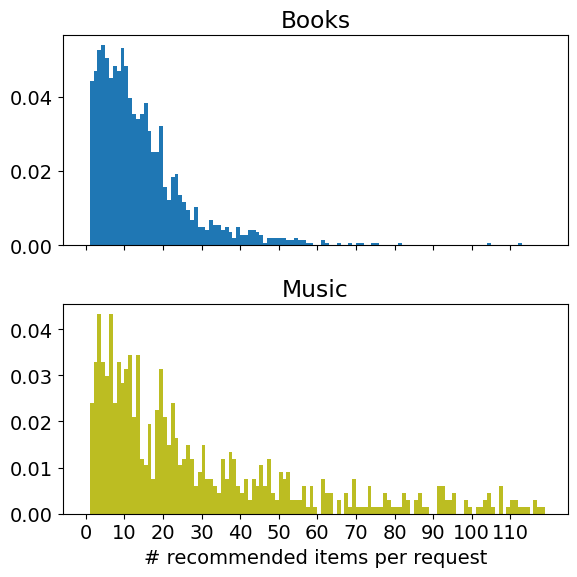

In [9]:
xtick_max = 120

fig, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

for i, domain in enumerate(statistics):
    flattened_counts = []
    num_recs_per_request = statistics[domain]['# recs/request']
    for rec_count, frequency in num_recs_per_request.items():
        flattened_counts.extend([rec_count] * frequency)
    
    axs[i].hist(flattened_counts, bins=range(0, xtick_max), density=True, color=colormap[domain])
    axs[i].set_title(domain.capitalize())
    axs[i].set_xticks(range(0, xtick_max, 10))
    
axs[i].set_xlabel('# recommended items per request')

plt.tight_layout()
fig.savefig(results_dir / 'items_per_request.pdf')
plt.show()

### Images per request

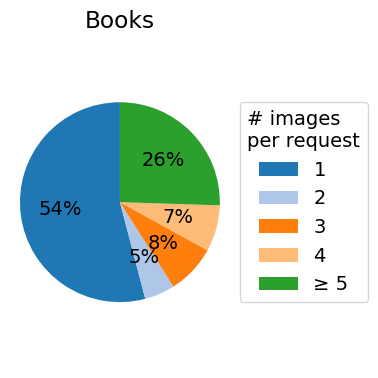

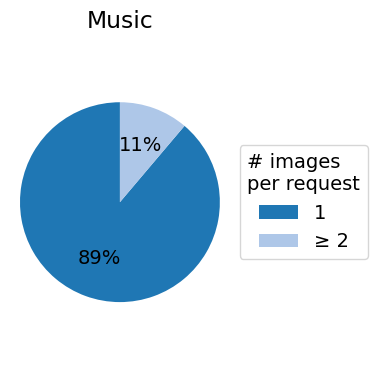

In [14]:
for domain in statistics:
    counts = statistics[domain]['# images/request']

    if domain == 'books':
        categories = {'1': 0, '2': 0, '3': 0, '4': 0, '≥ 5': 0}
        for key, value in counts.items():
            if key == 1:
                categories['1'] += value
            elif key == 2:
                categories['2'] += value
            elif key == 3:
                categories['3'] += value
            elif key == 4:
                categories['4'] += value
            else:
                categories['≥ 5'] += value
    elif domain == 'music':
        categories = {'1': 0, '≥ 2': 0}
        for key, value in counts.items():
            if key == 1:
                categories['1'] += value
            else:
                categories['≥ 2'] += value

    labels = list(categories.keys())
    sizes = list(categories.values())

    labels = list(categories.keys())
    sizes = list(categories.values())

    fig, ax = plt.subplots(figsize=(4, 4))  
    wedges, texts, autotexts = plt.pie(sizes, autopct='%1.0f%%', startangle=90, colors=plt.cm.tab20.colors)

    ax.legend(wedges, labels, title="# images\nper request", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.title(f'{domain.capitalize()}')
    plt.axis('equal')

    plt.tight_layout()
    fig.savefig(results_dir / f'images_per_request_{domain}.pdf', bbox_inches='tight')
    plt.show()

### Requests per year

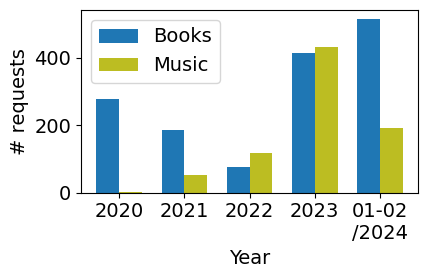

In [15]:
years = [2020, 2021, 2022, 2023, 2024]
index = np.arange(len(years))

values1 = [statistics['books']['# requests/year'].get(year, 0) for year in years]
values2 = [statistics['music']['# requests/year'].get(year, 0) for year in years]

fig, ax = plt.subplots(figsize=(4.5, 3))

bar_width = 0.35

bars1 = ax.bar(index, values1, bar_width, label='Books', color=colormap['books'])
bars2 = ax.bar(index + bar_width, values2, bar_width, label='Music', color=colormap['music'])

ax.set_xlabel('Year')
ax.set_ylabel('# requests')
ax.legend()

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['2020', '2021', '2022', '2023', '01-02\n/2024'])

plt.tight_layout()

fig.savefig(results_dir / 'requests_per_year.pdf', bbox_inches='tight')
plt.show()

### Description lengths

In [7]:
from lib.utils import read_jsonl
from collections import defaultdict

models = ['OFA-huge', 'llava-v1.5-13b', 'gpt-4-vision-preview']

model_to_description_words = defaultdict(list)
for model in models:
    for domain in ['books', 'music']:
        for d in read_jsonl(f'intermediate/{model}/{domain}/image/description.jsonl'):
            for description in d['description']:

                model_to_description_words[model].append(len(description.split()))


In [10]:
import numpy as np

for model in model_to_description_words:
    model_to_description_words[model] = np.mean(model_to_description_words[model])

In [11]:
model_to_description_words

defaultdict(list,
            {'OFA-huge': 6.967139479905438,
             'llava-v1.5-13b': 95.46130283847253,
             'gpt-4-vision-preview': 229.7647754137116})